# Credit Card Users Churn Prediction

## Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

You need to identify the best possible model that will give the required performance.

## Objective
* Explore and visualize the dataset.
* Build a classification model to predict if the customer is going to churn or not.
* Optimize the model using appropriate techniques.
* Generate a set of insights and recommendations that will help the bank.

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
* Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
* Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
* Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

### Importing Libraries

In [1]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

<IPython.core.display.Javascript object>

### Loading Data

In [2]:
churn = pd.read_csv("BankChurners.csv")

<IPython.core.display.Javascript object>

In [3]:
# Checking the number of rows and columns in the data
churn.shape

(10127, 21)

<IPython.core.display.Javascript object>

* The dataset has 10127 rows and 21 columns 

## Data Overview

In [4]:
# let's create a copy of the data
data = churn.copy()

<IPython.core.display.Javascript object>

In [5]:
# let's view the first 5 rows of the data
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

<IPython.core.display.Javascript object>

In [6]:
# let's view the last 5 rows of the data
data.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10122                      3      4003.000                 1851   
10123                      3      4277.000                 2186   
10124                      4      5409.000                    0   
10125                      3      5281.000                    0   
10126                      4     10388.000                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122         2152.000                 0.703            15476             117   
10123         2091.000                 0.804             8764              69   
10124         5409.000                 0.819            10291              60   
10125         5281.000                 0.535             8395              62   
10126         8427.000                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189

<IPython.core.display.Javascript object>

In [7]:
np.random.seed(1)  # to get the same random results every time
data.sample(n=10)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
6498  712389108  Existing Customer            43      F                2   
9013  718388733  Existing Customer            38      F                1   
2053  710109633  Existing Customer            39      M                2   
3211  717331758  Existing Customer            44      M                4   
5559  709460883  Attrited Customer            38      F                2   
6106  789105183  Existing Customer            54      M                3   
4150  771342183  Attrited Customer            53      F                3   
2205  708174708  Existing Customer            38      M                4   
4145  718076733  Existing Customer            43      M                1   
5324  821889858  Attrited Customer            50      F                1   

     Education_Level Marital_Status Income_Category Card_Category  \
6498        Graduate        Married  Less than $40K          Blue   
9013         College            NaN  Less than $40K          Blue   
2053         College        Married     $60K - $80K          Blue   
3211        Graduate        Married         $120K +          Blue   
5559       Doctorate        Married  Less than $40K          Blue   
6106   Post-Graduate         Single    $80K - $120K        Silver   
4150        Graduate         Single     $40K - $60K          Blue   
2205        Graduate        Married     $40K - $60K          Blue   
4145        Graduate         Single     $60K - $80K        Silver   
5324       Doctorate         Single             abc          Blue   

      Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
6498              36                         6                       3   
9013              32                         2                       3   
2053              31                         6                       3   
3211              32                         6                       3   
5559              28                         5                       2   
6106              42                         3                       1   
4150              40                         6                       3   
2205              27                         6                       2   
4145              31                         4                       3   
5324              46                         6                       4   

      Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
6498                      2      2570.000                 2107   
9013                      3      2609.000                 1259   
2053                      2      9871.000                 1061   
3211                      4     34516.000                 2517   
5559                      4      1614.000                    0   
6106                      2     34516.000                 2488   
4150                      2      1625.000                    0   
2205                      4      5535.000                 1276   
4145                      3     25824.000                 1170   
5324                      3      1970.000                 1477   

      Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
6498          463.000                 0.651             4058              83   
9013         1350.000                 0.871             8677              96   
2053         8810.000                 0.545             1683              34   
3211        31999.000                 0.765             4228              83   
5559         1614.000                 0.609             2437              46   
6106        32028.000                 0.552             4401              87   
4150         1625.000                 0.689             2314              43   
2205         4259.000                 0.636             1764              38   
4145        24654.000                 0.684             3101              73   
5324          493.000                 0.662             2493       

<IPython.core.display.Javascript object>

In [8]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<IPython.core.display.Javascript object>

* Only 6 variables are object types, the rest are all numerical.
* 2 columns have less than 10127 non-null values i.e. columns have missing values.

In [9]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [10]:
# let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

<IPython.core.display.Javascript object>

* `Education_Level` column has 15.0% missing values out of the total observations.
* `Marital_Status` column has 7.4% missing values out of the total observations.

* We will impute these values after we split the data into train, validation and test sets.

In [11]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

count          mean          std           min  \
CLIENTNUM                10127.000 739177606.334 36903783.450 708082083.000   
Customer_Age             10127.000        46.326        8.017        26.000   
Dependent_count          10127.000         2.346        1.299         0.000   
Months_on_book           10127.000        35.928        7.986        13.000   
Total_Relationship_Count 10127.000         3.813        1.554         1.000   
Months_Inactive_12_mon   10127.000         2.341        1.011         0.000   
Contacts_Count_12_mon    10127.000         2.455        1.106         0.000   
Credit_Limit             10127.000      8631.954     9088.777      1438.300   
Total_Revolving_Bal      10127.000      1162.814      814.987         0.000   
Avg_Open_To_Buy          10127.000      7469.140     9090.685         3.000   
Total_Amt_Chng_Q4_Q1     10127.000         0.760        0.219         0.000   
Total_Trans_Amt          10127.000      4404.086     3397.129       510.000   
Total_Trans_Ct           10127.000        64.859       23.473        10.000   
Total_Ct_Chng_Q4_Q1      10127.000         0.712        0.238         0.000   
Avg_Utilization_Ratio    10127.000         0.275        0.276         0.000   

                                   25%           50%           75%  \
CLIENTNUM                713036770.500 717926358.000 773143533.000   
Customer_Age                    41.000        46.000        52.000   
Dependent_count                  1.000         2.000         3.000   
Months_on_book                  31.000        36.000        40.000   
Total_Relationship_Count         3.000         4.000         5.000   
Months_Inactive_12_mon           2.000         2.000         3.000   
Contacts_Count_12_mon            2.000         2.000         3.000   
Credit_Limit                  2555.000      4549.000     11067.500   
Total_Revolving_Bal            359.000      1276.000      1784.000   
Avg_Open_To_Buy               1324.500      3474.000      9859.000   
Total_Amt_Chng_Q4_Q1             0.631         0.736         0.859   
Total_Trans_Amt               2155.500      3899.000      4741.000   
Total_Trans_Ct                  45.000        67.000        81.000   
Total_Ct_Chng_Q4_Q1              0.582         0.702         0.818   
Avg_Utilization_Ratio            0.023         0.176         0.503   

                                   max  
CLIENTNUM                828343083.000  
Customer_Age                    73.000  
Dependent_count                  5.000  
Months_on_book                  56.000  
Total_Relationship_Count         6.000  
Months_Inactive_12_mon           6.000  
Contacts_Count_12_mon            6.000  
Credit_Limit                 34516.000  
Total_Revolving_Bal           2517.000  
Avg_Open_To_Buy              34516.000  
Total_Amt_Chng_Q4_Q1             3.397  
Total_Trans_Amt              18484.000  
Total_Trans_Ct                 139.000  
Total_Ct_Chng_Q4_Q1              3.714  
Avg_Utilization_Ratio            0.999

<IPython.core.display.Javascript object>

**Observations:**
* `CLIENTNUM:` Being a unique identifier, it doesn't add any meaning to the analysis and can be dropped.
* We can observe that some columns might have outliers to the right as there is a large difference between 75th percentile and maximum values.
* We can observe that some columns might have outliers to the left as there is a large difference between 25th percentile and minimum values.
* A large number of columns have an approx equal mean and median.

In [12]:
# let's view the statistical summary of the non-numerical columns in the data
data.describe(exclude=np.number).T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level   8608      6           Graduate  3128
Marital_Status    9378      3            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

<IPython.core.display.Javascript object>

**Observations**
* Majority of the customers are still existing customers in the bank.
* Most of the customers are Females.
* Most of the customers are graduates.
* We have more married customers.
* The most commom income category of customers is "less than $40k".
* Blue is the most popular card category.

In [13]:
# Making a list of all categorical variables
cat_col = [
    "Attrition_Flag",
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
]

# convert to category
for cat in cat_col:
    data[cat] = data[cat].astype("category")

<IPython.core.display.Javascript object>

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           8608 non-null   category
 6   Marital_Status            9378 non-null   category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

<IPython.core.display.Javascript object>

* We have been able to convert object types to category and reduce memory usage.

In [15]:
# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
--------------------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
--------------------------------------------------
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
--------------------------------------------------
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
--------------------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
--------------------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
--------------------------------------------------


<IPython.core.display.Javascript object>

* We will treat the "abc" values in Income_Category during our missing value treatment

## Data Preprocessing

- We can drop the column - `CLIENTNUM` as it is unique for each customer and will not add value to the model.

In [16]:
# Dropping column - CLIENTNUM
data.drop(columns=["CLIENTNUM"], inplace=True)

<IPython.core.display.Javascript object>

* We will convert "abc" values to null and treat with other missing values

In [17]:
# Replacing abc with null values
data["Income_Category"] = data["Income_Category"].replace("abc", np.nan)

<IPython.core.display.Javascript object>

In [18]:
# check value counts including counts of nan values
data["Income_Category"].value_counts(dropna=False)

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
NaN               1112
$120K +            727
Name: Income_Category, dtype: int64

<IPython.core.display.Javascript object>

## EDA

### Univariate Analysis - Numerical

In [19]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

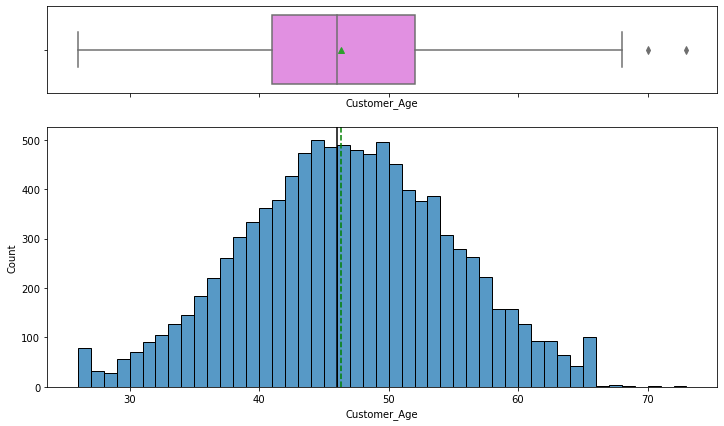

<IPython.core.display.Javascript object>

In [20]:
# Observations on Customer_Age
histogram_boxplot(data, "Customer_Age")

* As per the boxplot, there are outliers to the right in the 'Age' variable
* We will not be treating these, as some variation is always expected in real-world scenarios for the age variable
* Age has a fairly normal distribution with approx equal mean and median

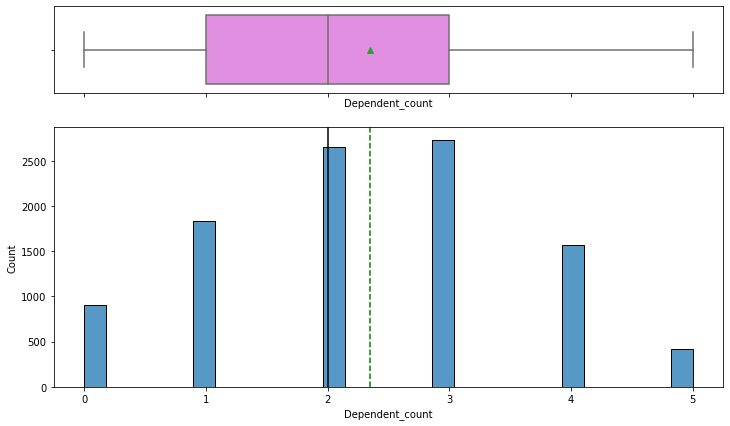

<IPython.core.display.Javascript object>

In [21]:
# observations on Dependent_count
histogram_boxplot(data, "Dependent_count")

- There are no outliers in the Dependent_count variable.
- Majority of the customers have less than 3 dependents.

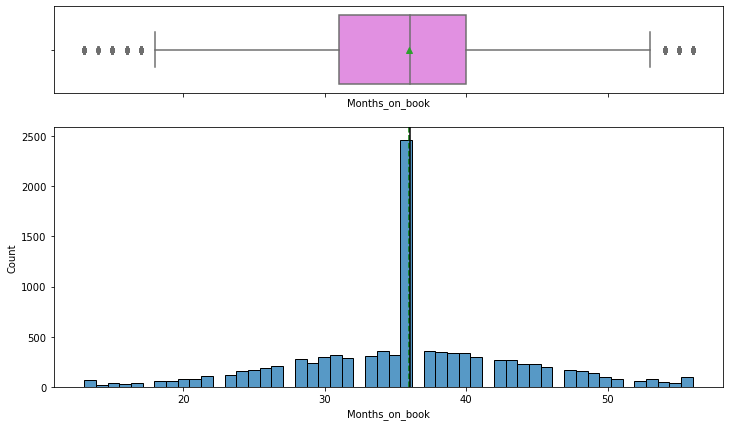

<IPython.core.display.Javascript object>

In [22]:
# observations on Months_on_book
histogram_boxplot(data, "Months_on_book")

* As per the boxplot, there are multiple outliers to the left and right of the distribution.
* We will not be treating these, as some variation is always expected in real-world scenarios for this variable
* Majority of the customers seem to be at the mean point of 36 months.

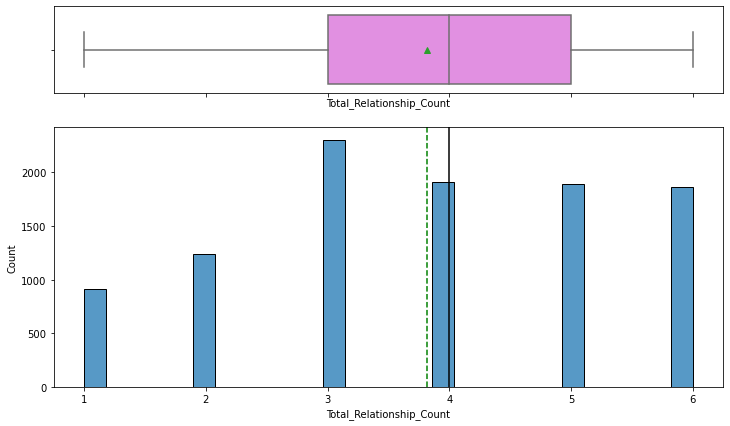

<IPython.core.display.Javascript object>

In [23]:
# observations on Total_Relationship_Count
histogram_boxplot(data, "Total_Relationship_Count")

* Customers have an average of about 4 products.
* Slightly skewed to the left and there are no outliers present.

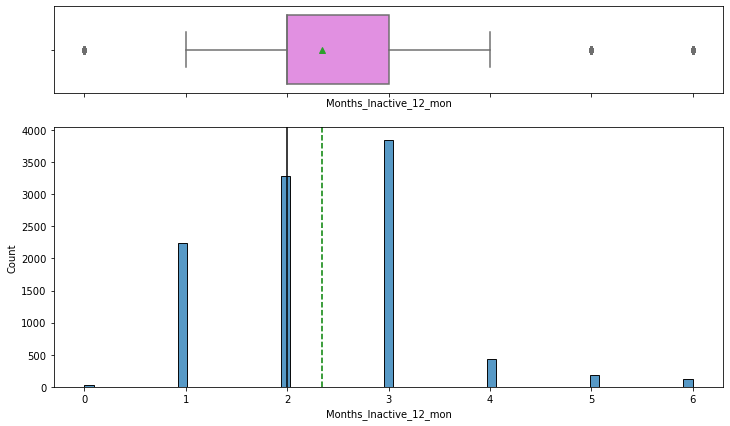

<IPython.core.display.Javascript object>

In [24]:
# observations on Months_Inactive_12_mon
histogram_boxplot(data, "Months_Inactive_12_mon")

* Customers spend an average of 2 months inactive.
* There are some outliers on both ends of the boxplot but we will not treat them as some variation is always expected in real-world scenarios for variables like months inactive.

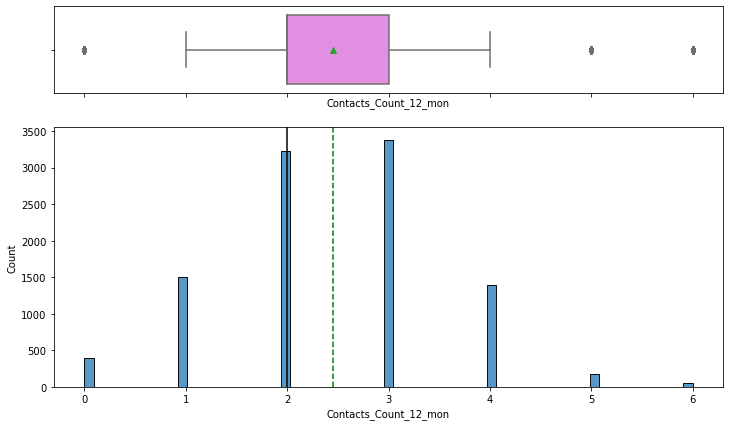

<IPython.core.display.Javascript object>

In [25]:
# observations on Contacts_Count_12_mon
histogram_boxplot(data, "Contacts_Count_12_mon")

* There are similarities between the distribution of number of months the customer has been inactive and number of contact between the customer and bank.

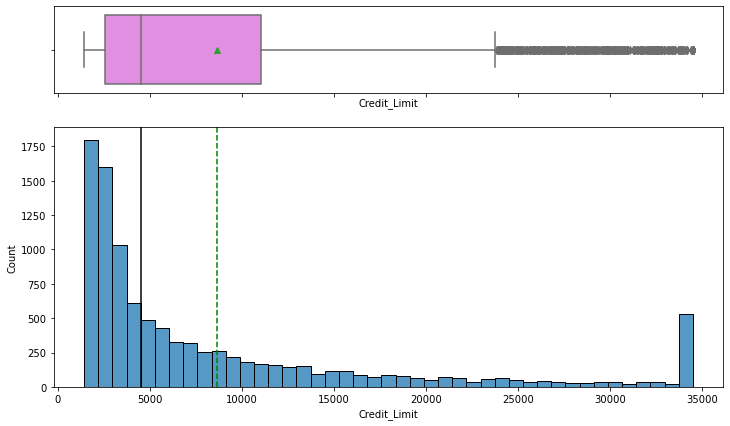

<IPython.core.display.Javascript object>

In [26]:
# observations on Credit_Limit
histogram_boxplot(data, "Credit_Limit")

* Credit_Limit is heavily right skewed with a lot of outliers to the right.
* We will not treat them as this represents a real market trend.

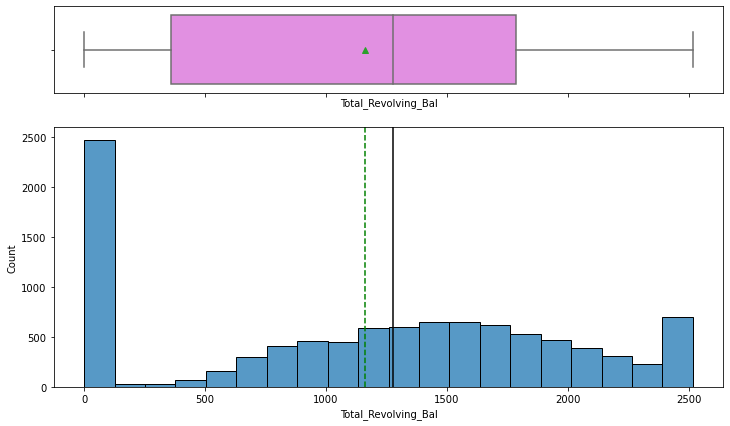

<IPython.core.display.Javascript object>

In [27]:
# observations on Total_Revolving_Bal
histogram_boxplot(data, "Total_Revolving_Bal")

* There are no outliers in the 'Total_Revolving_Bal' variable.
* Majority of the customers do not carry outstanding balance over to the next month.

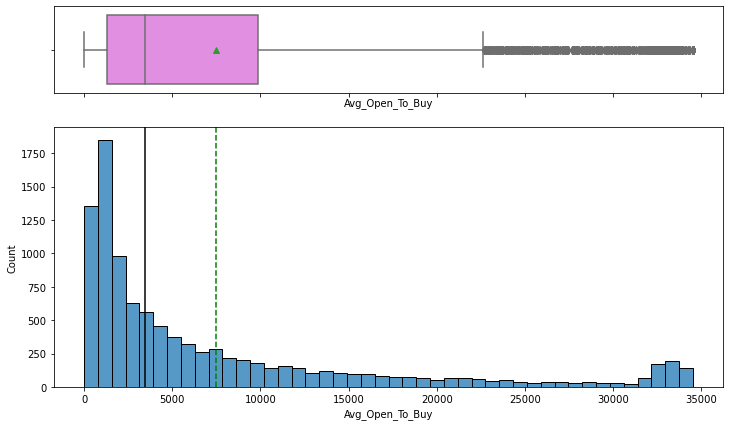

<IPython.core.display.Javascript object>

In [28]:
# observations on Avg_Open_To_Buy
histogram_boxplot(data, "Avg_Open_To_Buy")

* Avg_Open_To_Buy is heavily right skewed with a lot of outliers to the right.
* We will not treat them as this represents a real market trend.

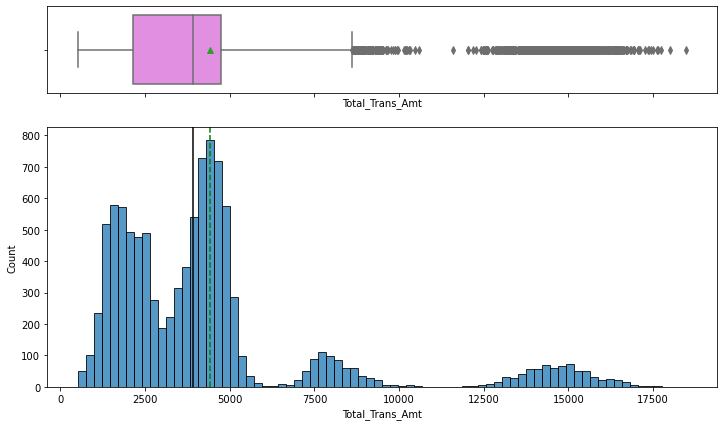

<IPython.core.display.Javascript object>

In [29]:
# observations on Total_Trans_Amt
histogram_boxplot(data, "Total_Trans_Amt")

* A lot of outliers to the right of the boxplot.
* These represent the real market trend but we will be capping the extreme values

In [30]:
data[data["Total_Trans_Amt"] > 17500]

Attrition_Flag  Customer_Age Gender  Dependent_count  \
9341   Existing Customer            48      M                2   
9601   Existing Customer            45      M                4   
9964   Existing Customer            47      M                4   
10073  Existing Customer            51      M                2   
10097  Existing Customer            31      M                0   

      Education_Level Marital_Status Income_Category Card_Category  \
9341      High School        Married  Less than $40K        Silver   
9601      High School         Single     $60K - $80K          Blue   
9964              NaN        Married     $60K - $80K          Blue   
10073        Graduate        Married     $60K - $80K          Blue   
10097     High School         Single     $40K - $60K          Blue   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
9341               36                         2                       2   
9601               35                         1                       1   
9964               36                         4                       5   
10073              40                         3                       3   
10097              25                         3                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
9341                       2     14581.000                 2517   
9601                       3      8449.000                 2092   
9964                       2     10585.000                 1749   
10073                      3      3750.000                 1801   
10097                      3      4493.000                 1388   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
9341         12064.000                 0.776            17628             109   
9601          6357.000                 0.709            17634             120   
9964          8836.000                 0.655            18484             108   
10073         1949.000                 0.889            17995             116   
10097         3105.000                 0.795            17744             104   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
9341                 0.817                  0.173  
9601                 0.667                  0.248  
9964                 0.588                  0.165  
10073                0.657                  0.480  
10097                0.763                  0.309

<IPython.core.display.Javascript object>

In [31]:
# Capping values for Total_Trans_Amt at 17500
data["Total_Trans_Amt"].clip(upper=17500, inplace=True)

<IPython.core.display.Javascript object>

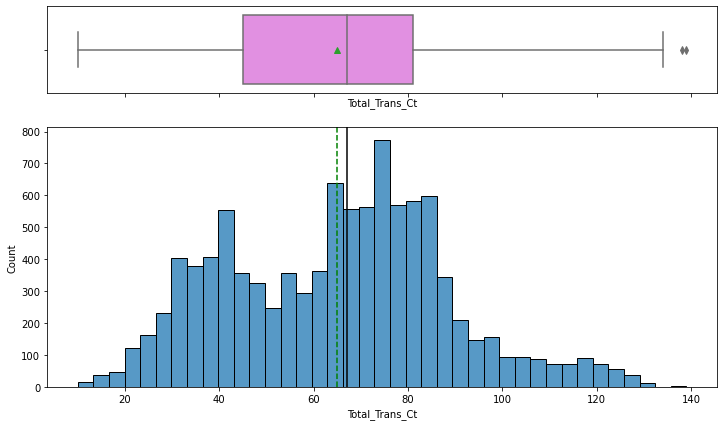

<IPython.core.display.Javascript object>

In [32]:
# observations on Total_Trans_Ct
histogram_boxplot(data, "Total_Trans_Ct")

* Customers average between 65 to 67 transactions in a year.
* There are some extreme outliers which we will be capping as we will not be losing much information.

In [33]:
data[data["Total_Trans_Ct"] > 132]

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
9213  Existing Customer            32      M                1      Uneducated   
9324  Existing Customer            41      M                3             NaN   
9586  Existing Customer            56      F                1     High School   

     Marital_Status Income_Category Card_Category  Months_on_book  \
9213         Single     $60K - $80K        Silver              36   
9324        Married         $120K +          Blue              33   
9586        Married             NaN          Blue              49   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
9213                         2                       3                      1   
9324                         2                       4                      3   
9586                         1                       2                      1   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
9213     33711.000                 1437        32274.000   
9324     34516.000                  638        33878.000   
9586     17542.000                 2517        15025.000   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
9213                 0.942            14880             134   
9324                 0.724            13085             139   
9586                 0.800            13939             138   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
9213                0.654                  0.043  
9324                0.675                  0.018  
9586                0.792                  0.143

<IPython.core.display.Javascript object>

In [34]:
# Capping values for number of web purchases at 11
data["Total_Trans_Ct"].clip(upper=132, inplace=True)

<IPython.core.display.Javascript object>

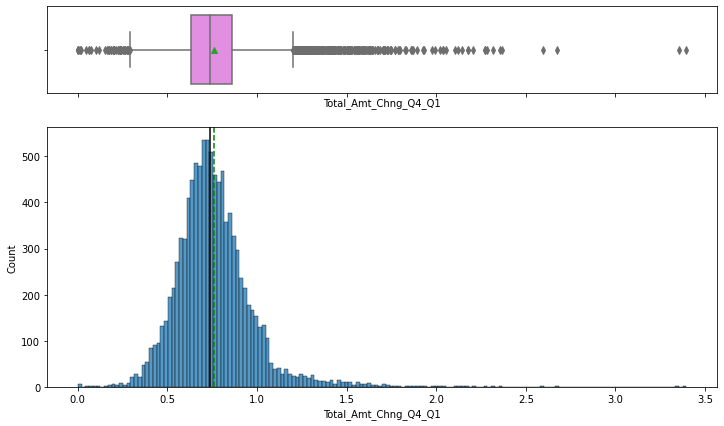

<IPython.core.display.Javascript object>

In [35]:
# observations on Total_Amt_Chng_Q4_Q1
histogram_boxplot(data, "Total_Amt_Chng_Q4_Q1")

* The distribution is heaviy skewed to the right.
* There are outliers on both sides of the boxplot.
* In treating the outliers, we will be capping the extreme values.

In [36]:
data[data["Total_Amt_Chng_Q4_Q1"] > 2.5]

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
2    Existing Customer            51      M                3        Graduate   
8    Existing Customer            37      M                3      Uneducated   
12   Existing Customer            56      M                1         College   
773  Existing Customer            61      M                0   Post-Graduate   

    Marital_Status Income_Category Card_Category  Months_on_book  \
2          Married    $80K - $120K          Blue              36   
8           Single     $60K - $80K          Blue              36   
12          Single    $80K - $120K          Blue              36   
773        Married             NaN          Blue              53   

     Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
2                           4                       1                      0   
8                           5                       2                      0   
12                          3                       6                      0   
773                         6                       2                      3   

     Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
2        3418.000                    0         3418.000                 2.594   
8       22352.000                 2517        19835.000                 3.355   
12      11751.000                    0        11751.000                 3.397   
773     14434.000                 1927        12507.000                 2.675   

     Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
2               1887              20                2.333   
8               1350              24                1.182   
12              1539              17                3.250   
773             1731              32                3.571   

     Avg_Utilization_Ratio  
2                    0.000  
8                    0.113  
12                   0.000  
773                  0.134

<IPython.core.display.Javascript object>

In [37]:
# Capping values for Total_Amt_Chng_Q4_Q1 at 2.5
data["Total_Amt_Chng_Q4_Q1"].clip(upper=2.5, inplace=True)

<IPython.core.display.Javascript object>

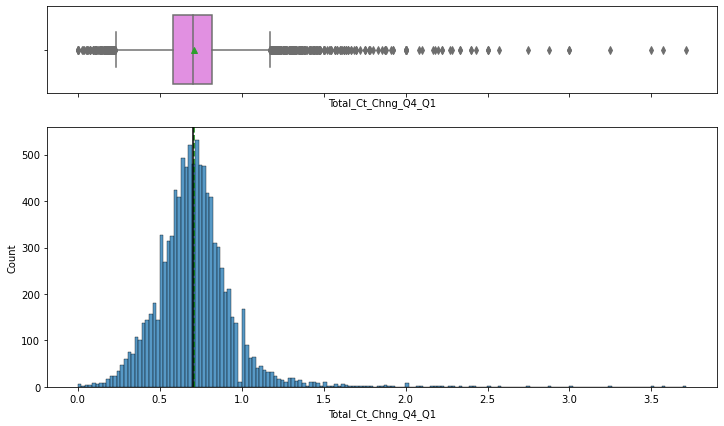

<IPython.core.display.Javascript object>

In [38]:
# observations on Total_Ct_Chng_Q4_Q1
histogram_boxplot(data, "Total_Ct_Chng_Q4_Q1")

* The distribution is heaviy skewed to the right.
* There are outliers on both sides of the boxplot.
* In treating the outliers, we will be capping the extreme values.

In [39]:
data[data["Total_Ct_Chng_Q4_Q1"] > 3.0]

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
1    Existing Customer            49      F                5        Graduate   
12   Existing Customer            56      M                1         College   
269  Existing Customer            54      M                5        Graduate   
773  Existing Customer            61      M                0   Post-Graduate   

    Marital_Status Income_Category Card_Category  Months_on_book  \
1           Single  Less than $40K          Blue              44   
12          Single    $80K - $120K          Blue              36   
269        Married     $60K - $80K          Blue              38   
773        Married             NaN          Blue              53   

     Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
1                           6                       1                      2   
12                          3                       6                      0   
269                         3                       3                      3   
773                         6                       2                      3   

     Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
1        8256.000                  864         7392.000                 1.541   
12      11751.000                    0        11751.000                 2.500   
269      2290.000                 1434          856.000                 0.923   
773     14434.000                 1927        12507.000                 2.500   

     Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
1               1291              33                3.714   
12              1539              17                3.250   
269             1119              18                3.500   
773             1731              32                3.571   

     Avg_Utilization_Ratio  
1                    0.105  
12                   0.000  
269                  0.626  
773                  0.134

<IPython.core.display.Javascript object>

In [40]:
# Capping values for Total_Ct_Chng_Q4_Q1 at 3.0
data["Total_Ct_Chng_Q4_Q1"].clip(upper=3.0, inplace=True)

<IPython.core.display.Javascript object>

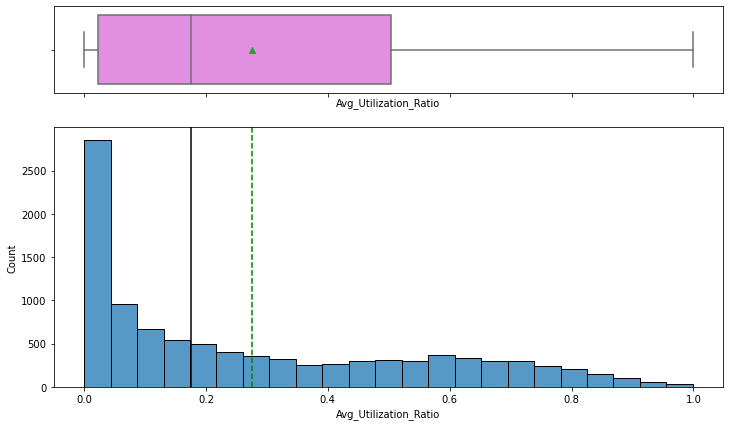

<IPython.core.display.Javascript object>

In [41]:
# observations on Avg_Utilization_Ratio
histogram_boxplot(data, "Avg_Utilization_Ratio")

* Distribution is skewed to the right.
* There are no outliers present in the data.

### Univariate Analysis - Categorical

In [42]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

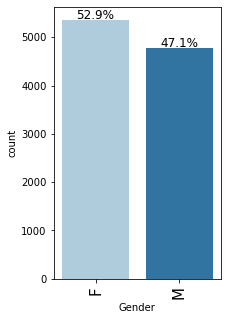

<IPython.core.display.Javascript object>

In [43]:
# observations on Gender
labeled_barplot(data, "Gender", perc=True)

- Majority of the customers are Female at 52.9%.

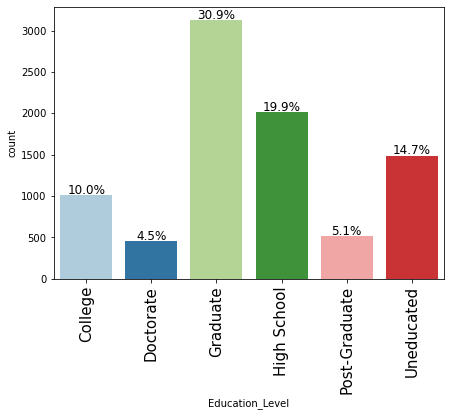

<IPython.core.display.Javascript object>

In [44]:
# observations on Education_Level
labeled_barplot(data, "Education_Level", perc=True)

* Majority of the customers are Graduates at 30.9%, followed by High School graduates at 19.9% and Uneducated customers at 14.7%.

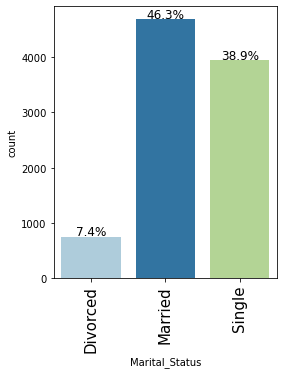

<IPython.core.display.Javascript object>

In [45]:
# observations on Marital_Status
labeled_barplot(data, "Marital_Status", perc=True)

* Most of the customers are married, with 46.3% married and 38.9% single

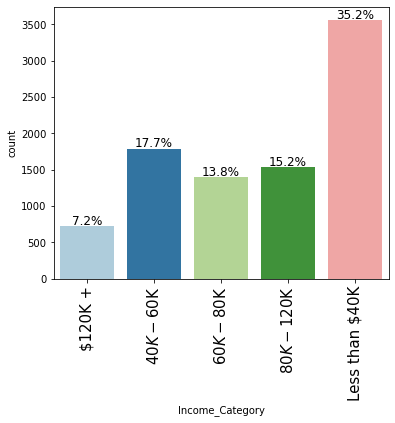

<IPython.core.display.Javascript object>

In [46]:
# observations on Income_Category
labeled_barplot(data, "Income_Category", perc=True)

* Majority of the customers i.e. 35.2% customers earn less than $40k.
* Followed by 17.7% who earn 40k - 60k and 15.2% who earn 80k - 120k.

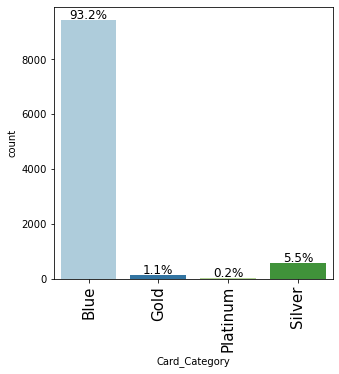

<IPython.core.display.Javascript object>

In [47]:
# observations on Card_Category
labeled_barplot(data, "Card_Category", perc=True)

* A resounding 93.2% of customers have a Blue card.
* We can assume that Gold, Platinum and Silver cards are for very special customers.

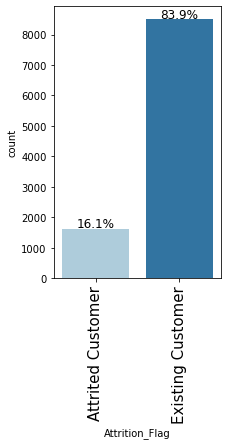

<IPython.core.display.Javascript object>

In [48]:
# observations on Attrition_Flag
labeled_barplot(data, "Attrition_Flag", perc=True)

* Our target variable Attrition_Flag has 83.9% as existing customers and 16.1% who have attrited.

### Bivariate Analysis

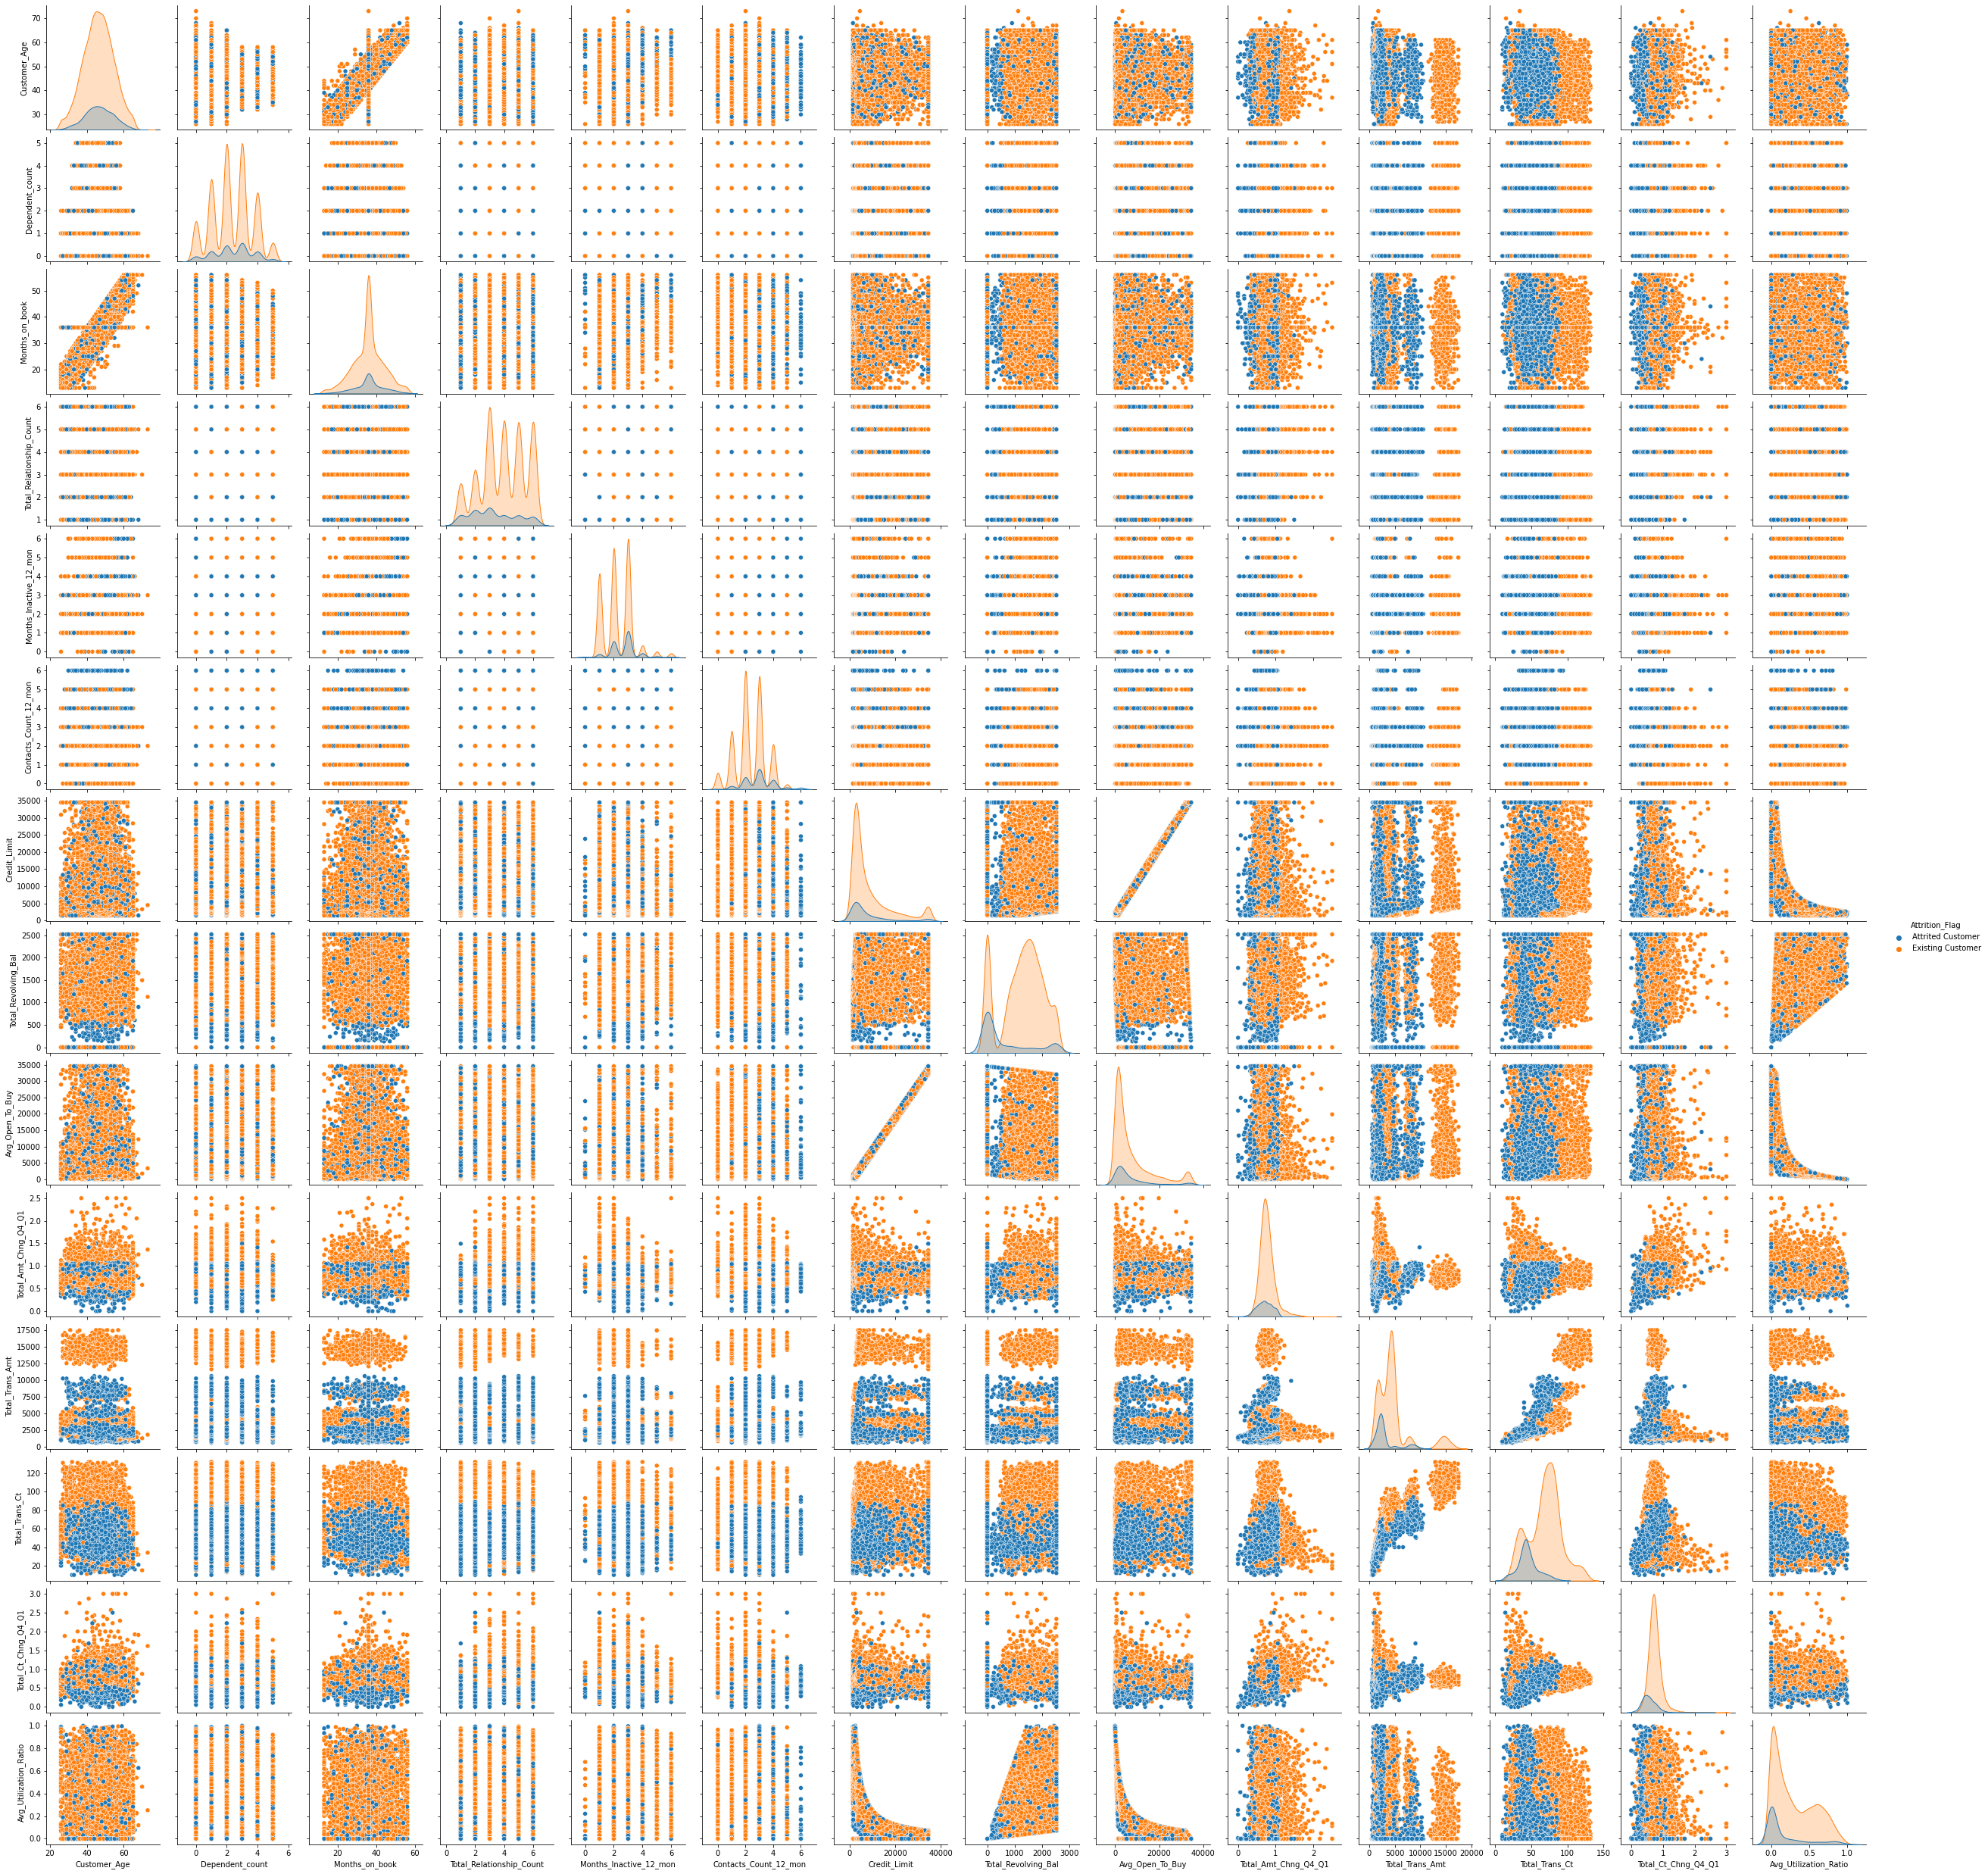

<IPython.core.display.Javascript object>

In [49]:
sns.pairplot(data, hue="Attrition_Flag")

- There are overlaps i.e. no clear distinction in the distribution of variables for people who attrited and did not.
- Let's explore this further with the help of other plots.

<AxesSubplot:xlabel='Card_Category', ylabel='Total_Trans_Amt'>

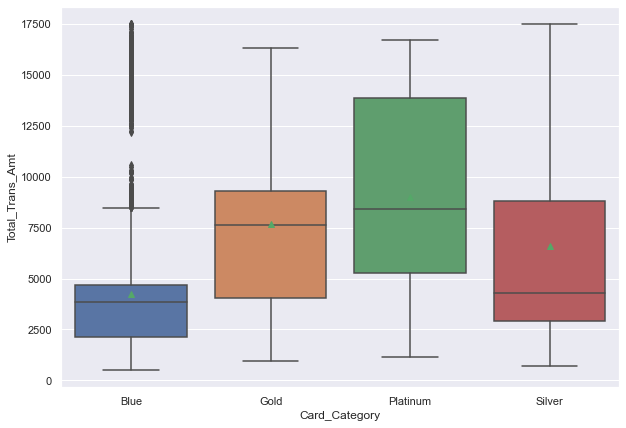

<IPython.core.display.Javascript object>

In [50]:
# Total_Trans_Amt and Card_Category
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(
    y="Total_Trans_Amt", x="Card_Category", data=data, orient="vertical", showmeans=True
)

<AxesSubplot:xlabel='Card_Category', ylabel='Total_Trans_Ct'>

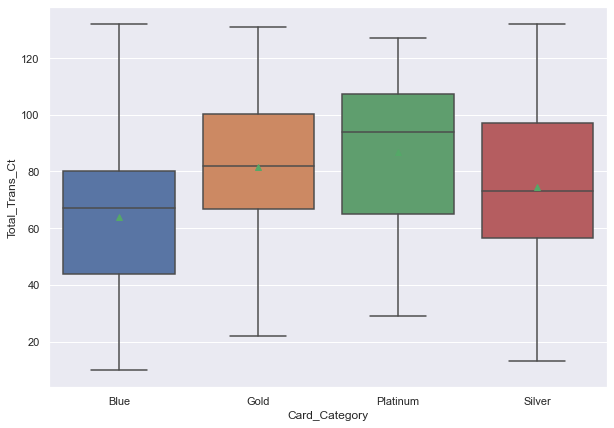

<IPython.core.display.Javascript object>

In [51]:
# Total_Trans_Ct and Card_Category
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(
    y="Total_Trans_Ct", x="Card_Category", data=data, orient="vertical", showmeans=True
)

* In comparing Total_Trans_Amt and Total_Trans_Ct across the card categories. We can observe the similar means for both columns across the categories, however the distribution seems to hint at some differences.
* In the Blue card category, the maximum value for total transaction counts is very high and we see outliers with a very high total transaction amount. This seems to suggest that even though the Blue card holders don't spend as much they still make a lot of transactions, albeit in smaller amounts.
* Although Silver and Blue card holders have the lowest total transaction amount average they still manage to have the highest total transaction amounts at $17500.
* The maximum transaction count for Platinum card holder is the lowest, even though they have the highest average for transaction counts. This could be explained by having the highest minimum transaction count.

<AxesSubplot:xlabel='Total_Trans_Amt', ylabel='Total_Trans_Ct'>

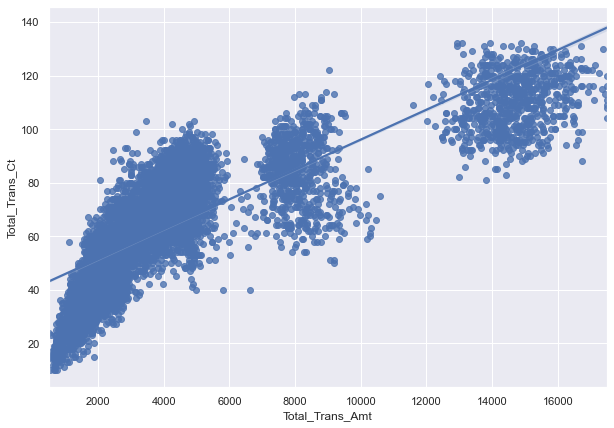

<IPython.core.display.Javascript object>

In [52]:
# Total_Trans_Ct and Total_Trans_Amt
sns.regplot(y=data.Total_Trans_Ct, x=data.Total_Trans_Amt)

* There is some positive correlation between these two variables but some variation is expected as evidenced by the previous observations.

<AxesSubplot:xlabel='Income_Category', ylabel='count'>

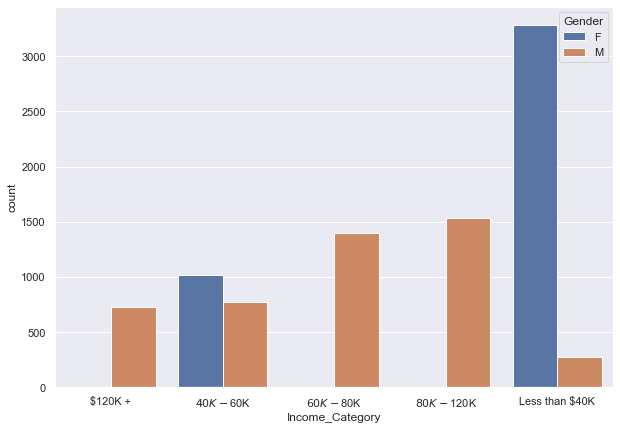

<IPython.core.display.Javascript object>

In [53]:
# Gender and Income_Category
sns.set(rc={"figure.figsize": (10, 7)})
sns.countplot(x="Income_Category", hue="Gender", data=data, orient="vertical")

* Female customers appear to have a larger presence in low income categories while male customers dominate the high income groups.

<AxesSubplot:xlabel='Income_Category', ylabel='Avg_Utilization_Ratio'>

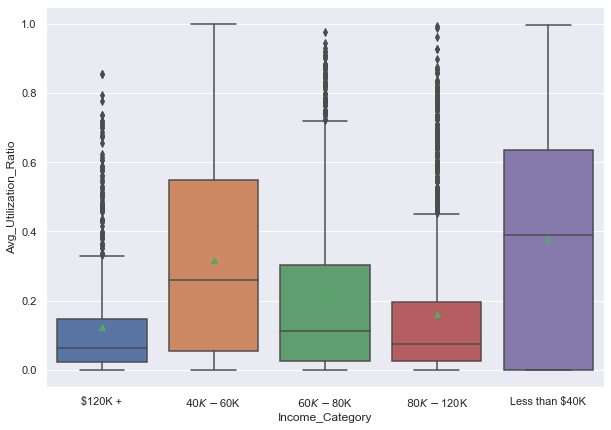

<IPython.core.display.Javascript object>

In [54]:
# Avg_Utilization_Ratio and Income_Category
sns.boxplot(
    y="Avg_Utilization_Ratio",
    x="Income_Category",
    data=data,
    orient="vertical",
    showmeans=True,
)

* There is a trend that suggests that lower income earners have a higher average utilization ratio and vice-versa.
* There are however, outliers in higher income groups.

### Bivariate Analysis - Numerical

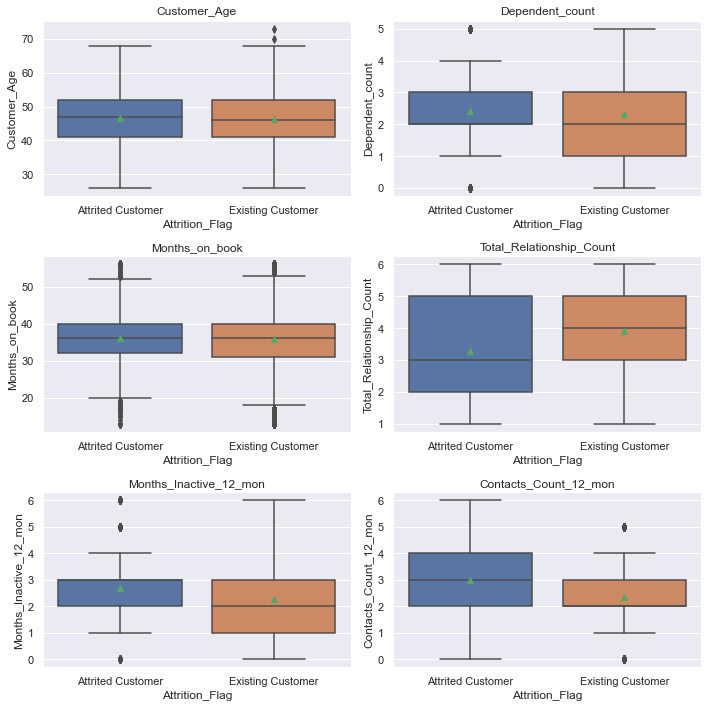

<IPython.core.display.Javascript object>

In [55]:
cols = data[
    [
        "Customer_Age",
        "Dependent_count",
        "Months_on_book",
        "Total_Relationship_Count",
        "Months_Inactive_12_mon",
        "Contacts_Count_12_mon",
    ]
].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["Attrition_Flag"], data[variable], showmeans=True)
    plt.tight_layout()
    plt.title(variable)
plt.show()

* The average total number of products held by attrited customers is less than existing customers.
* Average number of months inactive and counts of contact between bank and customer is greater for attrited customers.

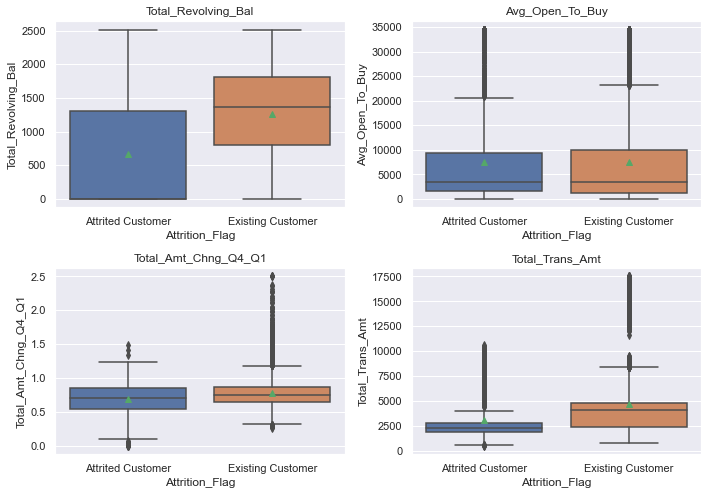

<IPython.core.display.Javascript object>

In [56]:
cols = data[
    [
        "Total_Revolving_Bal",
        "Avg_Open_To_Buy",
        "Total_Amt_Chng_Q4_Q1",
        "Total_Trans_Amt",
    ]
].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["Attrition_Flag"], data[variable], showmeans=True)
    plt.tight_layout()
    plt.title(variable)
plt.show()

* Attrited customers have a lower average revolving balance.
* Attrited customers also have a lower average total transaction amount across the last 12 months.

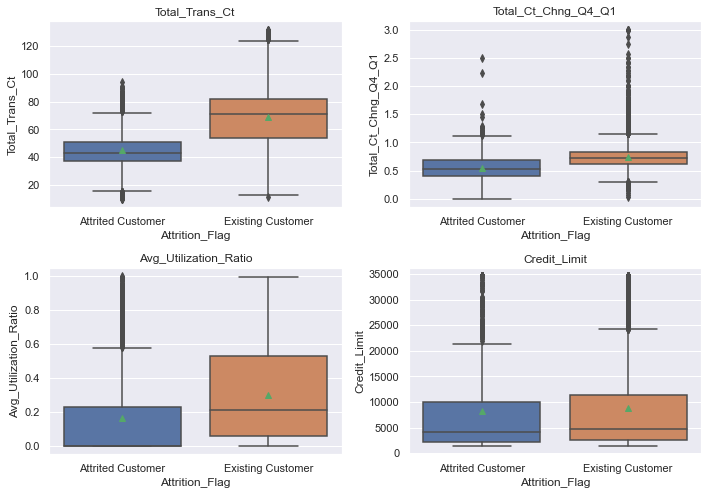

<IPython.core.display.Javascript object>

In [57]:
cols = data[
    ["Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1", "Avg_Utilization_Ratio", "Credit_Limit"]
].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["Attrition_Flag"], data[variable], showmeans=True)
    plt.tight_layout()
    plt.title(variable)
plt.show()

* Attrited customers have a lower average total transaction count across the last 12 months.
* Attrited customers also have a lower average utilization ratio.

### Bivariate Analysis - Categorical

In [58]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


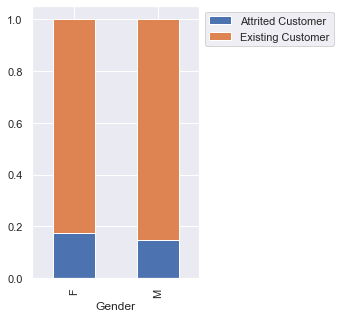

<IPython.core.display.Javascript object>

In [59]:
stacked_barplot(data, "Gender", "Attrition_Flag")

- We can see a clear trend here that Female customers are more likely to attrite.  

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


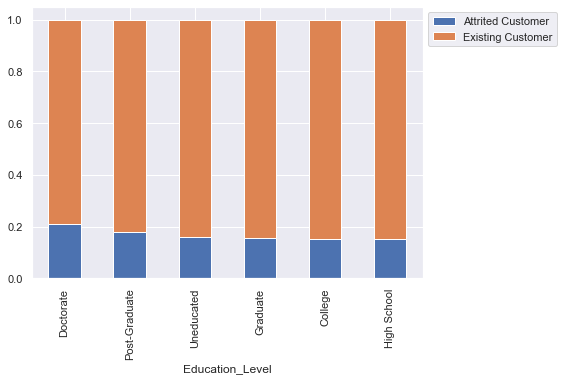

<IPython.core.display.Javascript object>

In [60]:
stacked_barplot(data, "Education_Level", "Attrition_Flag")

* We can observe that customers with a post graduate level of education are more likely to attrite.

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
------------------------------------------------------------------------------------------------------------------------


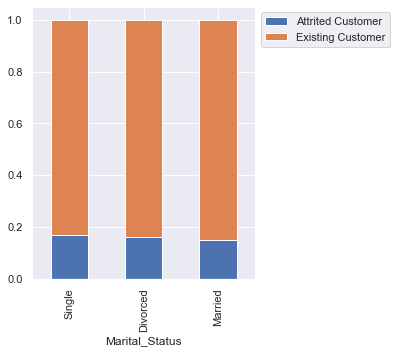

<IPython.core.display.Javascript object>

In [61]:
stacked_barplot(data, "Marital_Status", "Attrition_Flag")

* We saw earlier that number of married customers is much more than single or divorced but divorced/single customers are more likely to attrite.

Attrition_Flag   Attrited Customer  Existing Customer   All
Income_Category                                            
All                           1440               7575  9015
Less than $40K                 612               2949  3561
$40K - $60K                    271               1519  1790
$80K - $120K                   242               1293  1535
$60K - $80K                    189               1213  1402
$120K +                        126                601   727
------------------------------------------------------------------------------------------------------------------------


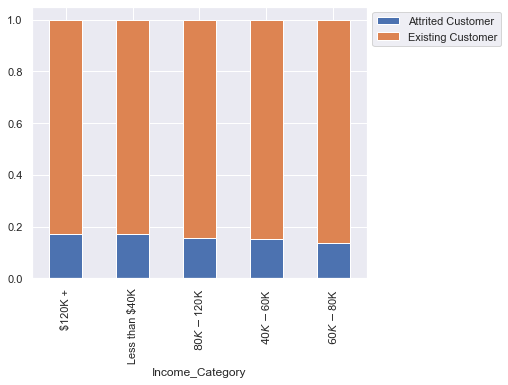

<IPython.core.display.Javascript object>

In [62]:
stacked_barplot(data, "Income_Category", "Attrition_Flag")

* We can observe that customers at extreme ends of the income category, i.e 120k+ and less than 40k are more likely to attrite.

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
------------------------------------------------------------------------------------------------------------------------


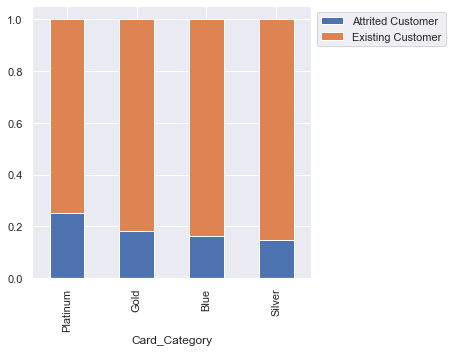

<IPython.core.display.Javascript object>

In [63]:
stacked_barplot(data, "Card_Category", "Attrition_Flag")

* Platinum and Gold card owners are more likely to attrite.

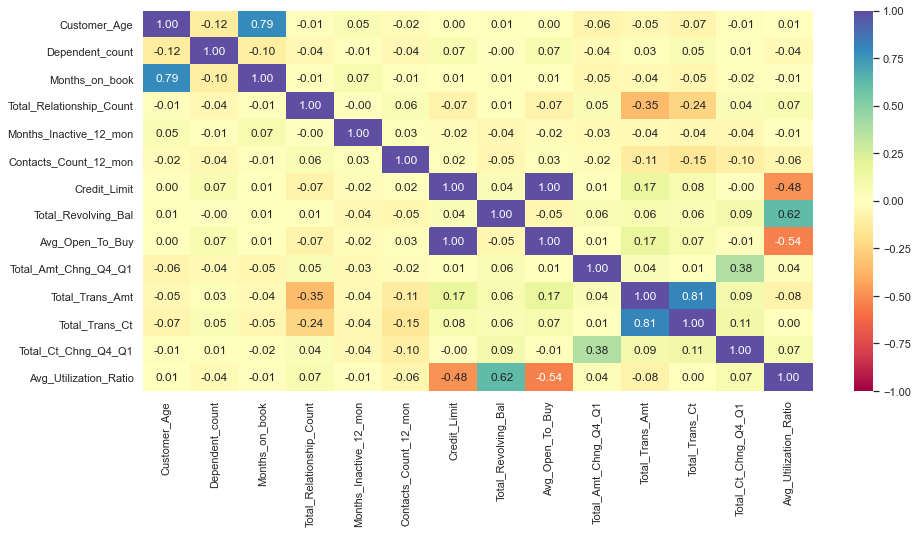

<IPython.core.display.Javascript object>

In [64]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Customer_Age is strongly positively correlated with Months_on_book which can be expected as older customers are more likely to have a longer period of relationship with the bank.
* Total_Trans_Amt is strongly positively correlated with Total_Trans_Ct which could suggest that customers who perform a lot of transactions are more likely to rack up a larger total transaction amount.
* There seems to be some positve correlation between Total_Revolving_Bal and Avg_Utilization_Ratio.
* Avg_Utilization_Ratio and Avg_Open_To_Buy have very low negative correlation.


### Data Preparation for Modeling

In [65]:
data1 = data.copy()

<IPython.core.display.Javascript object>

In [66]:
# Separating target variable and other variables
X = data1.drop(columns="Attrition_Flag")

Y = data1["Attrition_Flag"].apply(lambda x: 1 if x == "Attrited Customer" else 0)

<IPython.core.display.Javascript object>

In [67]:
# target variable value counts
Y.value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

<IPython.core.display.Javascript object>

In [68]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=1, stratify=Y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


<IPython.core.display.Javascript object>

### Missing-Value Treatment

* We will use most_frequent to impute missing values in Education_Level, Marital_Status and Income_Category column.

In [69]:
si = SimpleImputer(strategy="most_frequent")

mode_imputed_col = ["Education_Level", "Marital_Status", "Income_Category"]

# Fit and transform the train data
X_train[mode_imputed_col] = si.fit_transform(X_train[mode_imputed_col])

# Transform the validation data i.e. replace missing values with the mode calculated using training data
X_val[mode_imputed_col] = si.transform(X_val[mode_imputed_col])

# Transform the test data i.e. replace missing values with the mode calculated using training data
X_test[mode_imputed_col] = si.transform(X_test[mode_imputed_col])

<IPython.core.display.Javascript object>

In [70]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

<IPython.core.display.Javascript object>

In [71]:
# Creating dummy variables for categorical variables
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_val = pd.get_dummies(data=X_val, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)

<IPython.core.display.Javascript object>

In [72]:
# view first 5 rows of X train
X_train.head()

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
800             40                2              21                         6   
498             44                1              34                         6   
4356            48                4              36                         5   
407             41                2              36                         6   
8728            46                4              36                         2   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
800                        4                      3     20056.000   
498                        2                      0      2885.000   
4356                       1                      2      6798.000   
407                        2                      0     27000.000   
8728                       2                      3     15034.000   

      Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
800                  1602        18454.000                 0.466   
498                  1895          990.000                 0.387   
4356                 2517         4281.000                 0.873   
407                     0        27000.000                 0.610   
8728                 1356        13678.000                 0.754   

      Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
800              1687              46                0.533   
498              1366              31                0.632   
4356             4327              79                0.881   
407              1209              39                0.300   
8728             7737              84                0.750   

      Avg_Utilization_Ratio  Gender_M  Education_Level_Doctorate  \
800                   0.080         1                          0   
498                   0.657         1                          0   
4356                  0.370         1                          0   
407                   0.000         1                          0   
8728                  0.090         1                          0   

      Education_Level_Graduate  Education_Level_High School  \
800                          1                            0   
498                          1                            0   
4356                         0                            1   
407                          1                            0   
8728                         0                            1   

      Education_Level_Post-Graduate  Education_Level_Uneducated  \
800                               0                           0   
498                               0                           0   
4356                              0                           0   
407                               0                           0   
8728                              0                           0   

      Marital_Status_Married  Marital_Status_Single  \
800                        0                      1   
498                        1                      0   
4356                       1                      0   
407                        1                      0   
8728                       0                      0   

      Income_Category_$40K - $60K  Income_Category_$60K - $80K  \
800                             0                            0   
498                             0                            0   
4356                            0                            0   
407                             0                            1   
8728                            1                            0   

      Income_Category_$80K - $120K  Income_Category_Less than $40K  \
800                              0                               0   
498                              0                               1   
4356                             1                               0   
407                              0                               0   
8728                             0                   

<IPython.core.display.Javascript object>

## Building the model

### Model evaluation criterion:

#### Model can make wrong predictions as:
1. Predicting a customer will churn and the customer doesn't attrite - Loss of resources
2. Predicting a customer will not churn and the customer attrites - Loss of opportunity

#### Which case is more important? 
* Predicting a customer will not churn and the customer churns i.e. losing on a potential source of income for the company and opportunity to improve its services.

#### How to reduce this loss i.e need to reduce False Negatives?
* Company wants Recall to be maximized, greater the Recall lesser the chances of false negatives.

**Let's start by building different models using KFold and cross_val_score**

- `Stratified K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping the distribution of both classes in each fold the same as the target variable. Each fold is then used once as validation while the k - 1 remaining folds form the training set.

## Model Building

In [73]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 78.58451072736787
Random forest: 75.30507587650445
GBM: 81.24646781789639
Adaboost: 82.16745159602303
Xgboost: 86.78126635269493
dtree: 78.0727367870225

Training Performance:

Bagging: 98.5655737704918
Random forest: 100.0
GBM: 87.5
Adaboost: 82.6844262295082
Xgboost: 100.0
dtree: 100.0


<IPython.core.display.Javascript object>

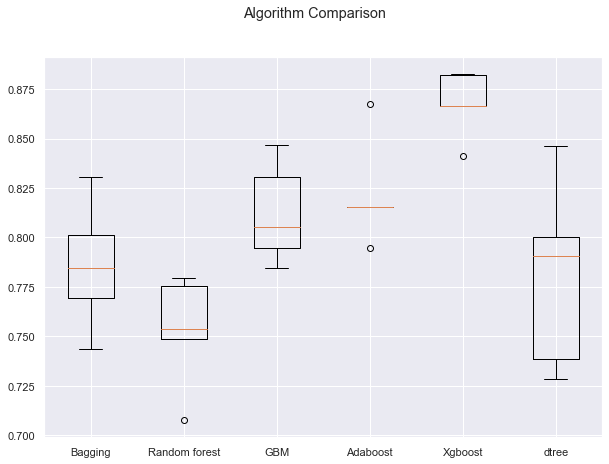

<IPython.core.display.Javascript object>

In [74]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- We can see that XGboost is giving the highest cross-validated recall, with Gradient and Ada boost also managing over 80%
- The boxplot shows that the performance of xgboost is consistent with 1 outlier and with 2 one outlier for Adaboost.
- The Performance of Adaboost is generalised on validation set.
- The Performance of the majority of the models are not well generalised.
- We will try using oversampled data.

### Oversampling train data using SMOTE

In [75]:
print(
    "Before UpSampling, counts of label 'Attrited Customer': {}".format(
        sum(y_train == 1)
    )
)
print(
    "Before UpSampling, counts of label 'Existing Customer': {} \n".format(
        sum(y_train == 0)
    )
)

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print(
    "After UpSampling, counts of label 'Attrited Customer': {}".format(
        sum(y_train_over == 1)
    )
)
print(
    "After UpSampling, counts of label 'Existing Customer': {} \n".format(
        sum(y_train_over == 0)
    )
)


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Attrited Customer': 976
Before UpSampling, counts of label 'Existing Customer': 5099 

After UpSampling, counts of label 'Attrited Customer': 5099
After UpSampling, counts of label 'Existing Customer': 5099 

After UpSampling, the shape of train_X: (10198, 29)
After UpSampling, the shape of train_y: (10198,) 



<IPython.core.display.Javascript object>

### Model building - Oversampled data

In [76]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 96.33275606611633
Random forest: 97.97993034308915
GBM: 97.13667763474379
Adaboost: 96.41109122746252
Xgboost: 98.39179126017434
dtree: 95.23442821682157

Training Performance:

Bagging: 99.74504804863699
Random forest: 100.0
GBM: 98.09766620906059
Adaboost: 96.90135320651108
Xgboost: 100.0
dtree: 100.0


<IPython.core.display.Javascript object>

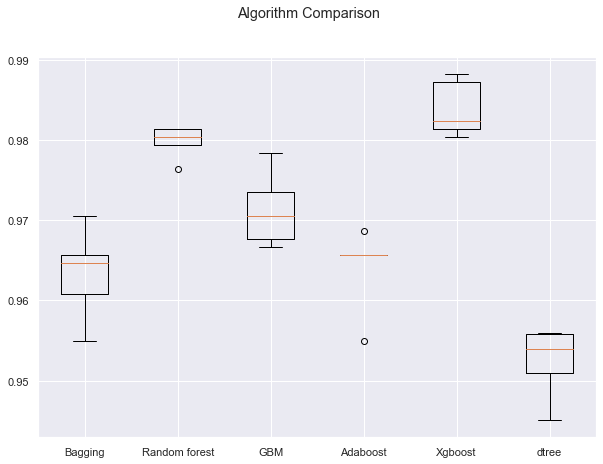

<IPython.core.display.Javascript object>

In [77]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- We seem to be getting much better training and cross-validated recall scores on the oversampled data.
- The performance of the models with oversampled data is generalised on validation set, which is most evident in Adaboost.
- We can see that XGboost is giving the highest cross-validated recall, followed by Random Forest and Gradient boost.
- The boxplot shows that the performance of Random forest is consistent with 1 outlier and with 2 one outlier for Adaboost.
- We will now use undersampled data to compare.

### Undersampling train data using Random Under Sampler

In [78]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [79]:
print(
    "Before Under Sampling, counts of label 'Attrited Customer': {}".format(
        sum(y_train == 1)
    )
)
print(
    "Before Under Sampling, counts of label 'Existing Customer': {} \n".format(
        sum(y_train == 0)
    )
)

print(
    "After Under Sampling, counts of label 'Attrited Customer': {}".format(
        sum(y_train_un == 1)
    )
)
print(
    "After Under Sampling, counts of label 'Existing Customer': {} \n".format(
        sum(y_train_un == 0)
    )
)

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Attrited Customer': 976
Before Under Sampling, counts of label 'Existing Customer': 5099 

After Under Sampling, counts of label 'Attrited Customer': 976
After Under Sampling, counts of label 'Existing Customer': 976 

After Under Sampling, the shape of train_X: (1952, 29)
After Under Sampling, the shape of train_y: (1952,) 



<IPython.core.display.Javascript object>

### Model building - Undersampled data

In [80]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 90.98430141287285
Random forest: 93.0334903192046
GBM: 94.36473050758765
Adaboost: 93.13762428048143
Xgboost: 95.28833071690215
dtree: 88.93458922030352

Training Performance:

Bagging: 99.07786885245902
Random forest: 100.0
GBM: 98.05327868852459
Adaboost: 95.28688524590164
Xgboost: 100.0
dtree: 100.0


<IPython.core.display.Javascript object>

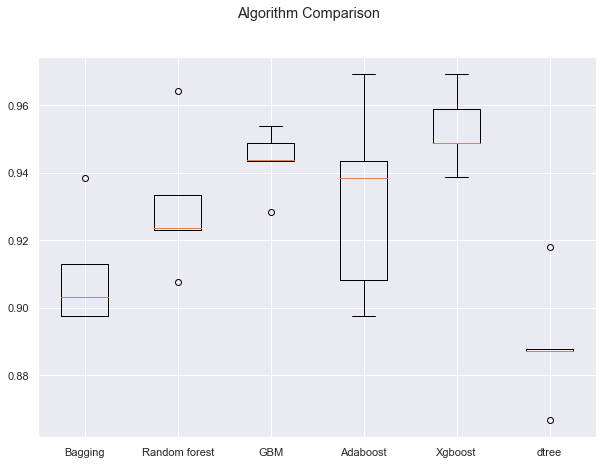

<IPython.core.display.Javascript object>

In [81]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- We seem to be getting good training and cross-validated recall scores on the undersampled data as well.
- The performance of the models with undersampled data is not generalised on validation set as in the oversampled data.
- We can see that XGboost, GBM, Adaboost and Random forest are giving the highest cross-validated recall.
- The boxplot shows outliers in all the models, except XGboost and Adaboost.

## Hyperparameter Tuning

**We will be selecting the best 3 models for tuning based on the following criteria in this order:**
- The models with the highest cross-validation score.
- The models generalised on the validation set.

**We will tune Gradient Boost, Random forest and XGboost models with oversampled data using RandomizedSearchCV. These have the the highest cross-validation score and are generalised on the validation set.**
- Gradient Boost has a score of 98.10 and 97.14 on training and validation sets respectively with oversampled data.
- Random forest has a score of 100 and 97.98 on training and validation sets respectively with oversampled data.
- XGboost has has a score of 100 and 98.39 on training and validation sets respectively with oversampled data.

**First, let's create two functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**

In [82]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [83]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Gradient Boost with Oversampled data

### RandomizedSearchCV

In [84]:
%%time 

# defining model
model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV

param_grid = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in GridSeachCV
randomized_cv.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
gbc_tuned = randomized_cv.best_estimator_

print(
    "Best Parameters:{} \nScore: {}".format(randomized_cv.best_params_, randomized_cv.best_score_)
)

Best Parameters:{'subsample': 0.9, 'n_estimators': 200, 'max_features': 0.7} 
Score: 0.9519603994689142
Wall time: 4min 18s


<IPython.core.display.Javascript object>

In [85]:
# Fit the model on training data
gbc_tuned.fit(X_train_over, y_train_over)

GradientBoostingClassifier(max_features=0.7, n_estimators=200, random_state=1,
                           subsample=0.9)

<IPython.core.display.Javascript object>

In [86]:
# Calculating different metrics on train set
Gradientboost_random_train = model_performance_classification_sklearn(
    gbc_tuned, X_train_over, y_train_over
)
print("Training performance:")
Gradientboost_random_train

Training performance:


Accuracy  Recall  Precision    F1
0     0.986   0.988      0.984 0.986

<IPython.core.display.Javascript object>

In [87]:
# Calculating different metrics on validation set
Gradientboost_random_val = model_performance_classification_sklearn(
    gbc_tuned, X_val, y_val
)
print("Validation performance:")
Gradientboost_random_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.965   0.911      0.876 0.893

<IPython.core.display.Javascript object>

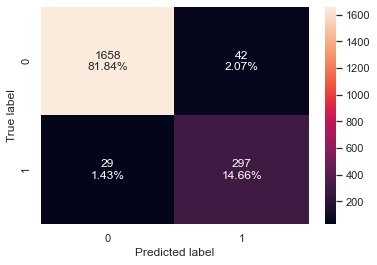

<IPython.core.display.Javascript object>

In [88]:
# creating confusion matrix
confusion_matrix_sklearn(gbc_tuned, X_val, y_val)

- There is a slight change in the validation recall compared to the results of cross-validated recall with default parameters.
- The tuned Gradient boost model is not significantly overfitting the training data.
- Precision and accuracy scores are satisfactory.

## Random Forest with Oversampled data

### RandomizedSearchCV

In [89]:
%%time 

# defining model
model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV

param_grid = {"n_estimators": [110,251,501],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": [0.7,0.9,'log2'],
        "max_samples": [0.7,0.9,None]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in GridSeachCV
randomized_cv.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
rf_tuned = randomized_cv.best_estimator_

print(
    "Best Parameters:{} \nScore: {}".format(randomized_cv.best_params_, randomized_cv.best_score_)
)

Best Parameters:{'n_estimators': 501, 'min_samples_leaf': 2, 'max_samples': 0.7, 'max_features': 0.7} 
Score: 0.9729382901345034
Wall time: 14min 43s


<IPython.core.display.Javascript object>

In [90]:
# Fit the model on training data
rf_tuned.fit(X_train_over, y_train_over)

RandomForestClassifier(max_features=0.7, max_samples=0.7, min_samples_leaf=2,
                       n_estimators=501, random_state=1)

<IPython.core.display.Javascript object>

In [91]:
# Calculating different metrics on train set
Randomforest_random_train = model_performance_classification_sklearn(
    rf_tuned, X_train_over, y_train_over
)
print("Training performance:")
Randomforest_random_train

Training performance:


Accuracy  Recall  Precision    F1
0     0.994   0.998      0.991 0.994

<IPython.core.display.Javascript object>

In [92]:
# Calculating different metrics on validation set
Randomforest_random_val = model_performance_classification_sklearn(
    rf_tuned, X_val, y_val
)
print("Validation performance:")
Randomforest_random_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.953   0.920      0.813 0.863

<IPython.core.display.Javascript object>

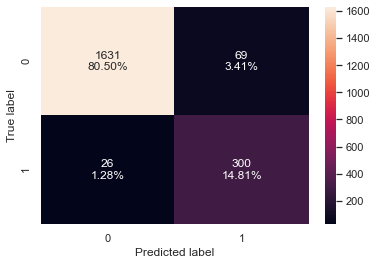

<IPython.core.display.Javascript object>

In [93]:
# creating confusion matrix
confusion_matrix_sklearn(rf_tuned, X_val, y_val)

- There is a slight change in the validation recall compared to the results of cross-validated recall with default parameters.
- The tuned Random forest model is not significantly overfitting the training data.
- Precision and accuracy scores are satisfactory.

## XGBoost with Oversampled data

### RandomizedSearchCV

In [94]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators': [50,75,100,125], 
              'subsample':[0.7, 0.8, 0.9, 1],
              'gamma':[1, 3, 5, 7],
              'colsample_bytree':[0.7, 0.8, 0.9, 1],
              'colsample_bylevel':[0.7, 0.8, 0.9, 1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

# Set the clf to the best combination of parameters
xgb_tuned = randomized_cv.best_estimator_

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'gamma': 3, 'colsample_bytree': 1, 'colsample_bylevel': 1} with CV score=0.9592156862745098:
Wall time: 3min 18s


<IPython.core.display.Javascript object>

In [95]:
xgb_tuned.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=3, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [96]:
# Calculating different metrics on train set
xgboost_random_train = model_performance_classification_sklearn(
    xgb_tuned, X_train_over, y_train_over
)
print("Training performance:")
xgboost_random_train

Training performance:


Accuracy  Recall  Precision    F1
0     0.996   0.997      0.995 0.996

<IPython.core.display.Javascript object>

In [97]:
# Calculating different metrics on validation set
xgboost_random_val = model_performance_classification_sklearn(xgb_tuned, X_val, y_val)
print("Validation performance:")
xgboost_random_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.969   0.920      0.893 0.906

<IPython.core.display.Javascript object>

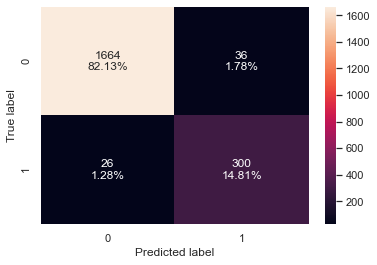

<IPython.core.display.Javascript object>

In [98]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned, X_val, y_val)

- There is a slight change in the validation recall compared to the results of cross-validated recall with default parameters.
- The tuned XGboost model is not significantly overfitting the training data.
- Precision and accuracy scores are satisfactory.

## Comparing all models

In [99]:
# training performance comparison

models_train_comp_df = pd.concat(
    [Gradientboost_random_train.T, Randomforest_random_train.T, xgboost_random_train.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient Boost Tuned with Random search",
    "Random forest Tuned with Random search",
    "Xgboost Tuned with Random Search",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Gradient Boost Tuned with Random search  \
Accuracy                                     0.986   
Recall                                       0.988   
Precision                                    0.984   
F1                                           0.986   

           Random forest Tuned with Random search  \
Accuracy                                    0.994   
Recall                                      0.998   
Precision                                   0.991   
F1                                          0.994   

           Xgboost Tuned with Random Search  
Accuracy                              0.996  
Recall                                0.997  
Precision                             0.995  
F1                                    0.996

<IPython.core.display.Javascript object>

In [100]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [Gradientboost_random_val.T, Randomforest_random_val.T, xgboost_random_val.T,],
    axis=1,
)
models_val_comp_df.columns = [
    "Gradient Boost Tuned with Random search",
    "Random forest Tuned with Random search",
    "Xgboost Tuned with Random Search",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


Gradient Boost Tuned with Random search  \
Accuracy                                     0.965   
Recall                                       0.911   
Precision                                    0.876   
F1                                           0.893   

           Random forest Tuned with Random search  \
Accuracy                                    0.953   
Recall                                      0.920   
Precision                                   0.813   
F1                                          0.863   

           Xgboost Tuned with Random Search  
Accuracy                              0.969  
Recall                                0.920  
Precision                             0.893  
F1                                    0.906

<IPython.core.display.Javascript object>

- The XGboost model and Random forest tuned using Random search is giving the best validation recall of 0.92 but XGboost seems to be the more balanced of the two, with better accuracy and precision scores.
- This would allow it to predict customers more likely to attrite, better in general.
- Let's check the performance of both model's on test set and then see the feature importance of the best.

#### Performance on the test set

In [101]:
# Calculating different metrics on the test set
xgboost_random_test = model_performance_classification_sklearn(
    xgb_tuned, X_test, y_test
)
print("Test performance:")
xgboost_random_test

Test performance:


Accuracy  Recall  Precision    F1
0     0.973   0.951      0.888 0.918

<IPython.core.display.Javascript object>

In [102]:
# Calculating different metrics on the test set
Randomforest_random_test = model_performance_classification_sklearn(
    rf_tuned, X_test, y_test
)
print("Test performance:")
Randomforest_random_test

Test performance:


Accuracy  Recall  Precision    F1
0     0.959   0.945      0.823 0.880

<IPython.core.display.Javascript object>

- The performance on test data is better in the tuned XGboost model and is generalised as well.

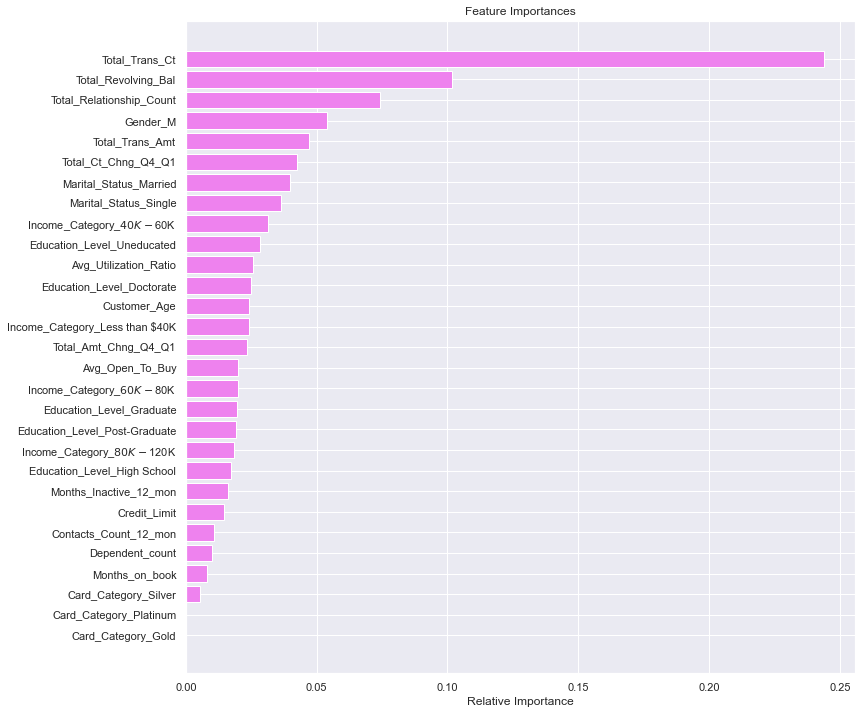

<IPython.core.display.Javascript object>

In [103]:
feature_names = X_train_over.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Total Transaction Count is the most important feature, followed by Total Revolving Balance, Total Relationship Count and Gender.

## Pipelines for productionizing the model
- Now, we have a final model. let's use pipelines to put the model into production

In [104]:
# creating a list of categorical variables
categorical_features = ["Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",]

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# Using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data 
# but not in "categorical_columns" to pass through the column transformer without any changes


<IPython.core.display.Javascript object>

In [105]:
# Separating target variable and other variables
X = data1.drop(columns="Attrition_Flag")
Y = data1["Attrition_Flag"].apply(lambda x: 1 if x == "Attrited Customer" else 0)

<IPython.core.display.Javascript object>

- Now we already know the best model we need to process with, so we don't need to divide data into 3 parts

In [106]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 19) (3039, 19)


<IPython.core.display.Javascript object>

In [107]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                eval_metric="logloss",
                subsample=0.9,
                n_estimators=100,
                gamma=3,
                colsample_bytree=1,
                colsample_bylevel=1,
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Education_Level',
                                                   'Marital_Status',
                                                   'Income_Category',
                                                   'Card_Category'])])),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsamp...
                               gamma=3, gpu_id=-1, importance_

<IPython.core.display.Javascript object>

## Conclusion

**XGBoost classifier with oversampled data tuned with random search is our final model which has given the best recall score on the test data.**

**We have been able to:**
- Explore and visualize the dataset.
- Build a classification model to predict if the customer is going to churn or not
- Optimize the model using appropriate techniques
- Generate a set of insights and recommendations that will help the bank


## Business Insights and Recommendations

* From our analysis we can see that customers with a low total transaction count and amount are more likely to churn. Therefore, having established the existence of a positive correlation between total transaction count, total transaction amount and card category. The bank should seek to promote regular credit card usage and thereby, increased spending. Also, providing incentives to its premium card holders and encouraging card upgrades.
* Customers with a high total revolving balance and average utilization ratio are less likely to churn. This seems to suggest that customers who attrite usually have a habit of maintaining little debt or under-utilizing their available credit. Perhaps to supplement their income, low income earners tend to utilize more of their available credit and vice-versa. The bank should provide incentives to high income earners and ensure that customers agree a payment plan in which they are comfortable utilizing their available credit without fear of defaulting or being in insurmountable debt.
* Our analysis seems to suggest that male customers are more likely to churn compared to female customers. Therefore, having established a trend of female customers in lower income categories. The bank should also look to target male customers in its attempt maximize profits on high income earners.
* Customers who hold a larger number of products are less likely to attrite. The bank could look to increase efforts to improve, market and sell more of its products to credit card users to reduce attrition rate.